In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.regression import *

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
columns = ['id', 'date', 'zipcode', 'lat', 'long']
data_clean = data.drop(columns=columns, axis=1)

In [6]:
data_clean.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
data_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [8]:
setup = setup(data_clean, target='price', train_size=0.6, n_jobs=-1,
              verbose=False, session_id=42, 
              numeric_features=['bedrooms', 'waterfront', 'view', 'condition', 'grade'])

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
bedrooms,Numeric
bathrooms,Numeric
sqft_living,Numeric
sqft_lot,Numeric
floors,Numeric
waterfront,Numeric
view,Numeric
condition,Numeric
grade,Numeric
sqft_above,Numeric


In [9]:
exclude = ['par', 'ada', 'knn', 'huber', 'omp', 'en', 'svm', 'mlp', 'lasso', 'ridge', 'llar', 'br', 'ard', 'ransac', 'tr', 'xgboost']
compare_models(fold=5, exclude=exclude)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,112505.3485,29586874234.7154,171781.6468,0.7634,0.2804,0.2358,3.5400
lightgbm,Light Gradient Boosting Machine,114524.9676,30637539863.8176,174702.3183,0.7555,0.2830,0.2396,0.0740
et,Extra Trees Regressor,114127.1292,31521414510.5309,177230.0106,0.7483,0.2859,0.2390,0.6540
rf,Random Forest Regressor,114444.8431,32070608022.5202,178740.6076,0.7441,0.2835,0.2374,1.1340
gbr,Gradient Boosting Regressor,119529.9839,32814798134.0387,180804.9312,0.7379,0.2935,0.2519,0.3880
lr,Linear Regression,136961.1188,42906396262.4000,206934.1281,0.6567,0.3739,0.2887,0.5200
lar,Least Angle Regression,136959.5236,42906640329.7845,206934.7535,0.6567,0.3738,0.2887,0.2500
dt,Decision Tree Regressor,156743.8412,59836266080.8158,244552.8419,0.5199,0.3906,0.3147,0.0340


In [12]:
cat_regressor = create_model('catboost', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,112328.0051,35321994968.0524,187941.4669,0.7426,0.2804,0.2363
1,113072.1280,27542903372.2254,165960.5476,0.7741,0.2786,0.2346
2,112422.3763,30488205318.3503,174608.7206,0.7662,0.2780,0.2356
3,112537.6707,27318082001.4460,165281.8260,0.7812,0.2820,0.2365
4,112166.5624,27263185513.5032,165115.6731,0.7526,0.2828,0.2361
Mean,112505.3485,29586874234.7154,171781.6468,0.7634,0.2804,0.2358
SD,308.3488,3112194463.9054,8828.3657,0.0141,0.0018,0.0007


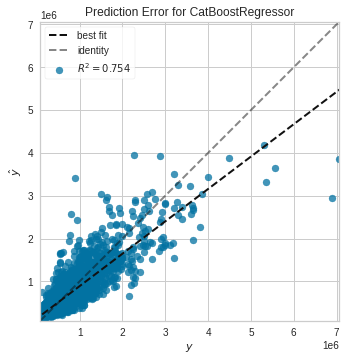

In [13]:
plot_model(cat_regressor, plot='error')

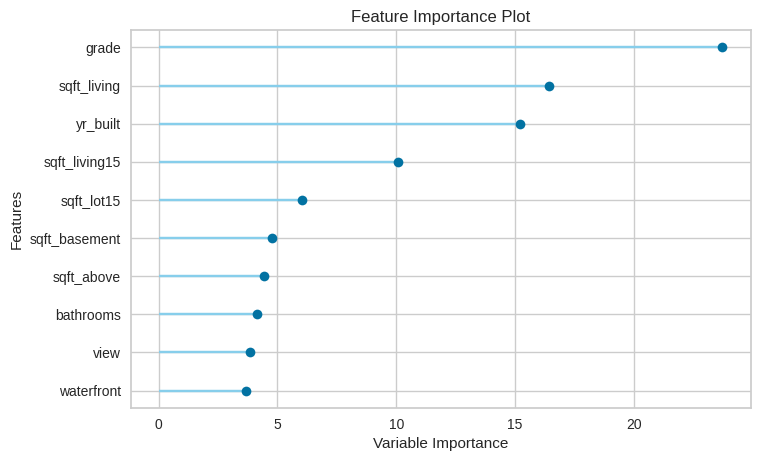

In [14]:
plot_model(cat_regressor, plot='feature')

In [10]:
# # 1 - Quantas casas estao disponiveis para compra?
# print('Estao disponiveis para compra:', data.shape[0], '\n')

# # 2 - Quantos atributos as casas tem?
# print('Quantos atributos as casas tem:', data.shape[1], '\n')

# # 3 - Quais sao os atributos da casa?
# print('Quais sao os atributos da casa:', data.columns, '\n')

# # 4 - Qual a casa mais cara?
# print('Valor maxido da casa:', data['price'].max(), '\n')

# # 5 - Qual a casa com maior numero de quartos?
# print('Qual a casa com maior numero de quartos:', data['bedrooms'].max(), '\n')

# # 6 - Qual a soma total de quartos do conjunto de dados?
# print('Qual a soma total de quartos do conjunto de dados:', data['bedrooms'].sum(), '\n')

# # 7 - Quanta casas possuem 2 banheiros?
# print('Quantidade de casas com dois banheiros:', data['bathrooms'].loc[data['bathrooms'] == 2].sum()/2, '\n')

# # 8 - Qual o preco medio de todas as casas do conjunto de dados?
# print('Qual o preco medio de todas as casas do conjunto de dados:', data['price'].mean(), '\n')

# # 9 - Qual o preco medio de casas com 2 banheiros?
# print('Qual o preco medio de casas com 2 banheiros?:',data['price'].loc[data['bathrooms'] == 2].mean(), '\n')

# # 10 - Qual o preco minimo entre as casas com 3 quartos?
# print('Qual o preco minimo entre as casas com 3 quartos:',data['price'].loc[data['bedrooms'] == 3].min(), '\n')   

# # 11 - Quantas casas possuem mais de 300 metros quadrados na sala de estar?
# print('Quantas casas possuem mais de 300 metros quadrados na sala de estar:', data['id'].loc[data['sqft_living'] > 300].count(), '\n')

# # 12 - Quantas casas tem mais de 2 andares?
# print('Quantas casas tem mais de 2 andares:', data['id'].loc[data['floors'] > 2].count(), '\n')

# # 13 - Quantas casas tem vista para o mar?
# print('Quantas casas tem vista para o mar:', data['id'].loc[data['waterfront'] == 1].count(), '\n')

# # 14 - Das casas com vista para o mar, quantas tem 3 quartos?
# print('Das casas com vista para o mar, quantas tem 3 quartos:', data['id'].loc[data['bedrooms'] == 3].loc[data['waterfront'] == 1].count(), '\n')

# # 15 - Das casas com mais de 300 metros quadrados de sala de estar, quantas possuem 3 banheiros?
# data['m2_living'] = data['sqft_living'] * 0.093

# print('Das casas com mais de 300 metros quadrados de sala de estar, quantas possuem 2 banheiros:', data['id'].loc[data['m2_living'] > 300].loc[data['bathrooms'] > 2].count(), '\n')